## First average out the 10 runs to eliminate sampling effects

In [1]:
import pickle
from collections import defaultdict
from framework.losses import interpoint_distance
import os
import pandas as pd

In [16]:
RESULTS_DIR = "./results/exp2"
N_RESULT_FILES = 10

def _load(name):
    with open(name, "rb") as f:
        return pickle.load(f)

In [8]:
df  = pd.DataFrame(_load('./results/exp2/experimenttwo_1.pkl'))

In [9]:
df

,size,sampling,dataset,algorithm,emb_x,labels,loss,convergence
0,0.3,random,mnist,umap,"[[0.79581475, 5.513641], [8.42719, 7.4045105],...","[9, 0, 0, 3, 1, 5, 7, 7, 1, 9, 0, 9, 5, 8, 4, ...",0,none
1,0.3,random,mnist,tsne,"[[-11.23244349342851, 7.760282887856037], [16....","[9, 3, 2, 9, 7, 7, 1, 8, 8, 2, 9, 7, 5, 0, 3, ...",0,none
2,0.3,random,fmnist,umap,"[[8.938401, -0.4750587], [-0.8468882, 10.33265...","[6, 1, 5, 4, 4, 7, 3, 5, 9, 8, 9, 2, 7, 1, 4, ...",0,none
3,0.3,random,fmnist,tsne,"[[36.10922742555402, 9.247506858201683], [-51....","[8, 8, 9, 7, 9, 9, 4, 2, 3, 1, 9, 4, 4, 9, 1, ...",0,none
4,0.3,random,olivetti,umap,"[[0.7214409, 8.730026], [1.023747, 10.336716],...","[29, 25, 4, 33, 18, 39, 17, 30, 35, 16, 35, 33...",0,none
...,...,...,...,...,...,...,...,...
91,1.0,stratified,mnist,tsne,"[[-1.679055557121028, -28.436427838713094], [-...","[8, 7, 1, 4, 6, 2, 8, 7, 5, 9, 0, 3, 9, 6, 6, ...",0,none
92,1.0,stratified,fmnist,umap,"[[10.148535, -1.7070179], [0.70308393, 10.9355...","[2, 8, 7, 1, 4, 9, 4, 5, 3, 3, 2, 7, 6, 2, 9, ...",0,none
93,1.0,stratified,fmnist,tsne,"[[36.98704269016337, 6.683756567688566], [-48....","[2, 8, 7, 1, 4, 9, 4, 5, 3, 3, 2, 7, 6, 2, 9, ...",0,none
94,1.0,stratified,olivetti,umap,"[[6.129333, 9.780859], [4.0644174, 9.933613], ...","[15, 10, 1, 34, 2, 17, 35, 33, 16, 24, 31, 14,...",0,none


In [10]:
df  = pd.DataFrame(_load('./results_test/experimenttwo_1.pkl'))

In [17]:
df

,size,sampling,convergence,dataset,algorithm,loss,emb_x,y
0,0.1,random,none,mnist,umap,0,"[[6.351173, 2.473119], [9.018723, 6.149277], [...","[5, 4, 3, 2, 5, 3, 4, 8, 9, 7, 9, 2, 5, 4, 0, ..."
1,0.1,random,none,mnist,tsne,0,"[[7.01001149947589, -3.5526509174068], [4.5179...","[5, 8, 3, 9, 3, 1, 2, 8, 2, 0, 6, 3, 5, 4, 7, ..."
2,0.1,random,none,fmnist,umap,0,"[[6.1526504, 2.40961], [0.18441729, 10.224571]...","[3, 8, 0, 8, 9, 1, 0, 3, 7, 7, 7, 3, 4, 8, 1, ..."
3,0.1,random,none,fmnist,tsne,0,"[[27.16231532822061, 4.572005287879306], [-41....","[3, 4, 4, 5, 5, 8, 3, 4, 1, 3, 4, 3, 3, 0, 3, ..."
4,0.1,random,none,olivetti,umap,0,"[[3.0711052, 10.879909], [3.1704242, 12.504108...","[32, 23, 5, 32, 23, 36, 37, 23, 15, 39, 1, 9, ..."
...,...,...,...,...,...,...,...,...
115,1.0,stratified,none,mnist,tsne,0,"[[0.11935761614931635, -28.924417557695364], [...","[8, 7, 1, 4, 6, 2, 8, 7, 5, 9, 0, 3, 9, 6, 6, ..."
116,1.0,stratified,none,fmnist,umap,0,"[[10.089837, -2.1285326], [0.5380002, 10.95093...","[2, 8, 7, 1, 4, 9, 4, 5, 3, 3, 2, 7, 6, 2, 9, ..."
117,1.0,stratified,none,fmnist,tsne,0,"[[39.074199361838645, 10.867123919872627], [-4...","[2, 8, 7, 1, 4, 9, 4, 5, 3, 3, 2, 7, 6, 2, 9, ..."
118,1.0,stratified,none,olivetti,umap,0,"[[8.685571, 14.629197], [8.066422, 16.966312],...","[15, 10, 1, 34, 2, 17, 35, 33, 16, 24, 31, 14,..."


In [7]:
RESULTS_DIR = "./results/exp2"
N_RESULT_FILES = 10
for filename in os.listdir(RESULTS_DIR):
    print(filename)
    
if len(os.listdir(RESULTS_DIR)) != N_RESULT_FILES:
    print("Some runs are missing please check the results folder")

experimenttwo_5.pkl
experimenttwo_4.pkl
experimenttwo_6.pkl
experimenttwo_7.pkl
experimenttwo_3.pkl
experimenttwo_2.pkl
experimenttwo_1.pkl
experimenttwo_10.pkl
experimenttwo_9.pkl
experimenttwo_8.pkl


In [18]:
def group(results):
    
    def _sort(groups):
        
        sorted_groups = {}
        for key, x in groups.items():
            sorted_groups[key] = sorted(x, key=lambda k: k['size'])
            
        return sorted_groups
    
    groups = defaultdict(list)
    for result in results:
        samp, dataset, algo = result['sampling'], result['dataset'], result['algorithm']
        key = tuple([samp, dataset, algo])
        groups[key].append({
            "emb_x": result['emb_x'],
            "labels": result['labels'],
            "size": result['size']
        })
    return _sort(dict(groups))

In [24]:
def groups_to_interpoint(groups):
    
    def _do_interpoint(arr):
        embeddings = [x['emb_x'] for x in arr]
        interpoints = []
        for i in range(0, len(embeddings) - 1):
            
            #Set j = -1 to look at distance from the ground truth.
            j = -1
            
            interpoints.append(interpoint_distance(embeddings[i], embeddings[j]))
        return interpoints
        
    interpoint_groups = {}
    for key, value in groups.items():
        interpoint_groups[key] = _do_interpoint(value)

    return interpoint_groups

In [25]:
def create_average_data(RESULTS_DIR, N_RESULT_FILES, preprocess="interpoint"):
    print("Listing all result files...")
    for filename in os.listdir(RESULTS_DIR):
        print(filename)
    
    if len(os.listdir(RESULTS_DIR)) != N_RESULT_FILES:
        print("Some runs are missing please check the results folder")
    
    print("---------------------------------------------------------")
    
    print("Combining files now....")
    exp1_runs = {}
    i=0
    print("Loading Data...")
    for run in os.listdir(RESULTS_DIR):
        result = _load(os.path.join(RESULTS_DIR, run))
        if preprocess == "interpoint":
            result = groups_to_interpoint(group(result))
        exp1_runs[i] = pd.DataFrame(result)
        i +=1
    
    print("Averaging...")
    averages = exp1_runs[0].copy()
    averages.loc[:,:] = 0
    for i in range(N_RESULT_FILES):
        for j in range(len(averages.columns)):
            averages.iloc[:,j] += exp1_runs[i].iloc[:,j]
    
    averages = averages / N_RESULT_FILES
    
    print("Merge complete!")
    
    return averages





In [21]:
interpoint_results = create_average_data(RESULTS_DIR, N_RESULT_FILES)

Listing all result files...
experimenttwo_5.pkl
experimenttwo_4.pkl
experimenttwo_6.pkl
experimenttwo_7.pkl
experimenttwo_3.pkl
experimenttwo_2.pkl
experimenttwo_1.pkl
experimenttwo_10.pkl
experimenttwo_9.pkl
experimenttwo_8.pkl
---------------------------------------------------------
Combining files now....
Loading Data...
Averaging...
Merge complete!


In [23]:
interpoint_results

random                                                          \
         mnist                       fmnist                   olivetti   
          umap          tsne           umap           tsne        umap   
0  3264.137822  11308.205210   72038.945490  201723.213978  731.017500   
1  4119.932778   9136.858669   73999.255271  196949.839820  733.411546   
2  5454.379677   7879.195858  127690.378299  171603.874273  705.309912   
3  5614.856038   4575.987990   16355.956693  150353.310279  721.058065   
4  5216.409258   5480.418954   15525.496934  117023.291002  632.879308   
5  4177.704431   3753.750105   14081.377280  109624.983072  582.215613   
6  3813.752244   2155.045514   11916.001797   72285.822729  588.590146   

                 stratified                                             \
                      mnist                      fmnist                  
          tsne         umap         tsne           umap           tsne   
0   795.805587  5068.199991  7498.900649  279931.698562  102448.550939   
1   982.955548  2357.950155  6003.247396   16025.797793  127548.022953   
2  1261.737553  2254.398478  2401.023221   14278.873423  140910.440607   
3  1522.232729  2034.384312  1690.665412   15694.562611   90677.420655   
4  1691.002008  4380.232978  3152.886847   15390.696257   77054.542931   
5  1617.099343  4747.756967  1702.349238   13158.114963   85958.597218   
6  2037.692425  1735.929916  2655.541356   18418.347743   65648.389449   

                            
     olivetti               
         umap         tsne  
0  700.521925   607.643776  
1  890.471524  1186.877685  
2  615.179022  1710.105752  
3  642.369445   824.968264  
4  547.339156  2007.701821  
5  498.465552  2217.155251  
6  424.468436   785.933176

In [26]:
distance_from_truth_results = create_average_data(RESULTS_DIR, N_RESULT_FILES)

Listing all result files...
experimenttwo_5.pkl
experimenttwo_4.pkl
experimenttwo_6.pkl
experimenttwo_7.pkl
experimenttwo_3.pkl
experimenttwo_2.pkl
experimenttwo_1.pkl
experimenttwo_10.pkl
experimenttwo_9.pkl
experimenttwo_8.pkl
---------------------------------------------------------
Combining files now....
Loading Data...
Averaging...
Merge complete!


In [27]:
distance_from_truth_results

random                                                          \
         mnist                       fmnist                   olivetti   
          umap          tsne           umap           tsne        umap   
0  3977.164732  15415.682068  134828.200307  296524.256756  742.222267   
1  3337.459817  11771.901933   77674.716837  239728.535668  711.464072   
2  4946.939446   9173.880196  133124.339031  223339.234492  710.408597   
3  5143.295922   7578.918977   18235.293119  169771.101800  599.906666   
4  3922.791118   6902.264239   16294.274323  105905.944910  504.971710   
5  3760.084525   3706.991029   13084.487625  107612.868506  499.145628   
6  3813.752244   2155.045514   11916.001797   72285.822729  588.590146   

                 stratified                                              \
                      mnist                       fmnist                  
          tsne         umap          tsne           umap           tsne   
0  1508.466876  5477.927743  11474.845272  294104.456046  266384.388600   
1  1642.609580  3296.530970   9237.337703   24956.339802  232912.122503   
2  1505.833775  2431.451224   5952.737269   22256.265716  183592.422238   
3  1579.312560  1972.345012   5096.195459   23568.526823  117718.361199   
4  1777.920721  2254.616657   4674.993043   22697.436596   96013.324440   
5  1895.599247  4807.424748   3300.874613   17348.974034   88323.796264   
6  2037.692425  1735.929916   2655.541356   18418.347743   65648.389449   

                            
     olivetti               
         umap         tsne  
0  800.254356  1228.032001  
1  775.659552  1334.262403  
2  731.221238  1975.393829  
3  641.718286  1144.053308  
4  445.463778  1197.257753  
5  479.914080  2165.391682  
6  424.468436   785.933176

### Now we look at plots!

In [49]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
SAMPLING = ['random', 'stratified']
ALGORITHMS = ['tsne', 'umap']
DATASETS = ['olivetti', 'fmnist', 'mnist']
x_axis = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [71]:
def create_lineplots_by_dataset(dataset="mnist", sampling="random", metric="interpoint"):
    if sampling == 'both':
        sns.lineplot(x_axis, data['random'][dataset]['umap'])
        sns.lineplot(x_axis, data['stratified'][dataset]['umap'])
        sns.lineplot(x_axis, data['random'][dataset]['tsne'])
        sns.lineplot(x_axis, data['stratified'][dataset]['tsne'])
        plt.legend(['umap(r)', 'umap(s)','tsne(r)', 'tsne(s)'])
        plt.title(str(dataset))


    else:
        sns.lineplot(x_axis, data[sampling][dataset]['umap'])
        sns.lineplot(x_axis, data[sampling][dataset]['tsne'])
        plt.legend(['umap', 'tsne'])
        plt.title(str(dataset) + "(" + str(sampling) + " sampling)")

    if metric == 'interpoint':
        ylabel = 'Net interpoint distance from ground truth'
    
    plt.ylabel(ylabel)
    plt.xlabel('Dataset fraction')


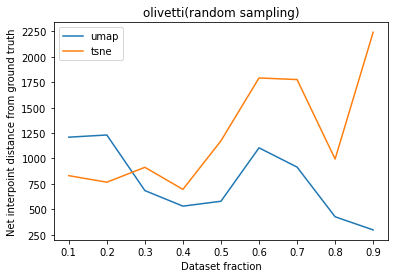

In [75]:
create_lineplots_by_dataset(dataset='olivetti')

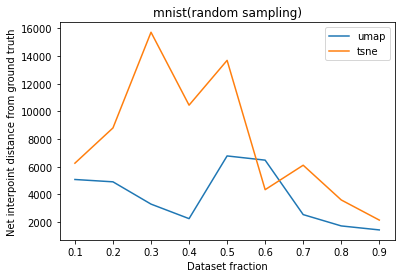

In [76]:
create_lineplots_by_dataset(dataset='mnist')

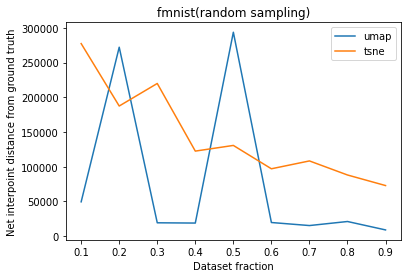

In [77]:
create_lineplots_by_dataset(dataset='fmnist')